In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


# 2. Pricing Factors and Assets

## 2.1. The Factors. Calculate their univariate performance statistics: • mean • volatility • Sharpe • VaR(.05). Does each factor have a premium (positive expected excess return)?

In [2]:
factors = pd.read_excel("factor_pricing_data.xlsx",sheet_name="factors (excess returns)", index_col=0, parse_dates=[0])

In [3]:
def risk_metrics(df, adj = 12):
    """
        df: dated DataFrame of returns, 1 column for each ticker
        
        returns a pd.DataFrame
    """
    adj = 12
    perf = pd.DataFrame()
    perf['mean_annualized'] = df.mean() * adj
    perf['vol_annualized'] = df.std() * np.sqrt(adj)
    perf['sharpe_annualized'] = df.mean() / df.std() * np.sqrt(adj)
    perf['VaR (0.05)'] = df.quantile(0.05)
    return perf

In [4]:
factors.head()

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112


In [5]:
risk_metrics(factors)

,mean_annualized,vol_annualized,sharpe_annualized,VaR (0.05)
MKT,0.084670,0.157359,0.538069,-0.074085
SMB,0.008190,0.101133,0.080985,-0.042570
HML,0.026023,0.109886,0.236820,-0.042100
RMW,0.046288,0.083433,0.554789,-0.029745
CMA,0.030632,0.073065,0.419236,-0.027270
UMD,0.062608,0.154907,0.404163,-0.068145


Yes, all factors have a positive mean return/risk premium.

## 2.2. The factors are constructed in such a way as to reduce correlation between them. Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small?

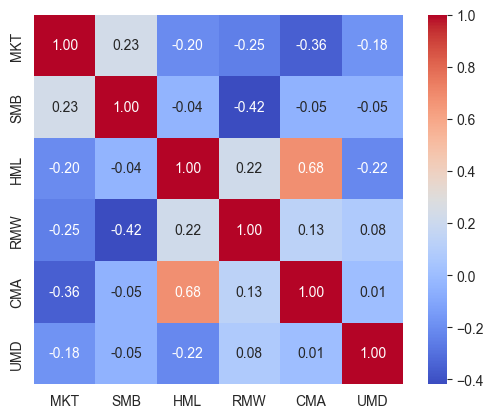

In [6]:
sns.heatmap(factors.corr(), annot=True, cmap='coolwarm', fmt=".2f",square=True)
plt.show()

All correlations are relatively low, except for correlation between CMA and HML, which is at 0.68.

## 2.3. Plot the cumulative returns of the factors.

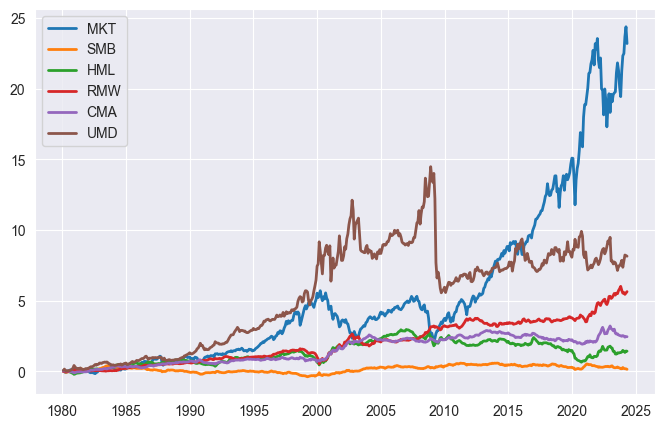

In [7]:
factors_cum_rets = (1 + factors).cumprod() - 1
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(factors_cum_rets.index, factors_cum_rets, lw = 2)
ax.legend(factors_cum_rets.columns)

## 2.4. Test assets

In [8]:
assets = pd.read_excel("factor_pricing_data.xlsx",sheet_name="portfolios (excess returns)", index_col=0, parse_dates=[0])
assets.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685


In [9]:
assets_risk = risk_metrics(assets)
assets_risk.T

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
mean_annualized,0.088320,0.096198,0.106683,0.114760,0.130013,0.058775,0.117142,0.074017,0.080384,0.094881,...,0.092601,0.088493,0.086461,0.113120,0.102580,0.090645,0.096018,0.045074,0.110693,0.052980
vol_annualized,0.218354,0.150865,0.220344,0.169987,0.223101,0.249654,0.264903,0.206644,0.153582,0.224242,...,0.199138,0.201386,0.180272,0.187374,0.181735,0.215036,0.180918,0.251191,0.223460,0.211046
sharpe_annualized,0.404478,0.637646,0.484164,0.675113,0.582752,0.235426,0.442207,0.358184,0.523397,0.423120,...,0.465007,0.439420,0.479614,0.603713,0.564448,0.421534,0.530728,0.179443,0.495361,0.251037
VaR (0.05),-0.088725,-0.059395,-0.094595,-0.067675,-0.091980,-0.109560,-0.109370,-0.084920,-0.068525,-0.100140,...,-0.088100,-0.087745,-0.077485,-0.079510,-0.074525,-0.094515,-0.076840,-0.104010,-0.104610,-0.096875


## 2.5. Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

<Axes: xlabel='vol_annualized', ylabel='mean_annualized'>

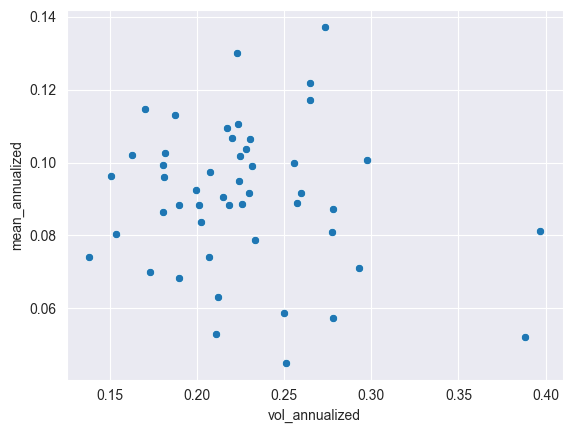

In [10]:
sns.scatterplot(x = assets_risk['vol_annualized'], y= assets_risk['mean_annualized'], legend="full")

There is no real correlation between vol and returns

<Axes: xlabel='VaR (0.05)', ylabel='mean_annualized'>

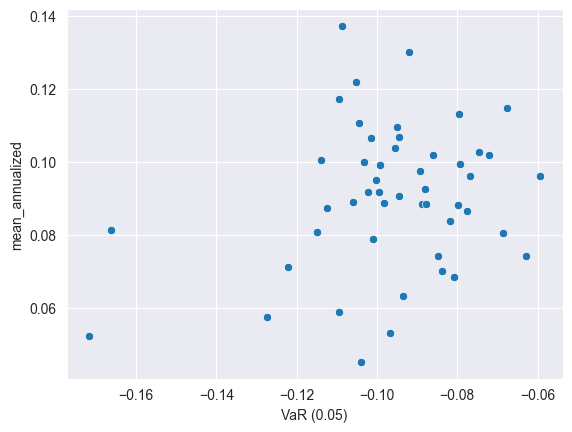

In [11]:
sns.scatterplot(x = assets_risk['VaR (0.05)'], y= assets_risk['mean_annualized'], legend="full")

nor is there correlation between VaR and returns

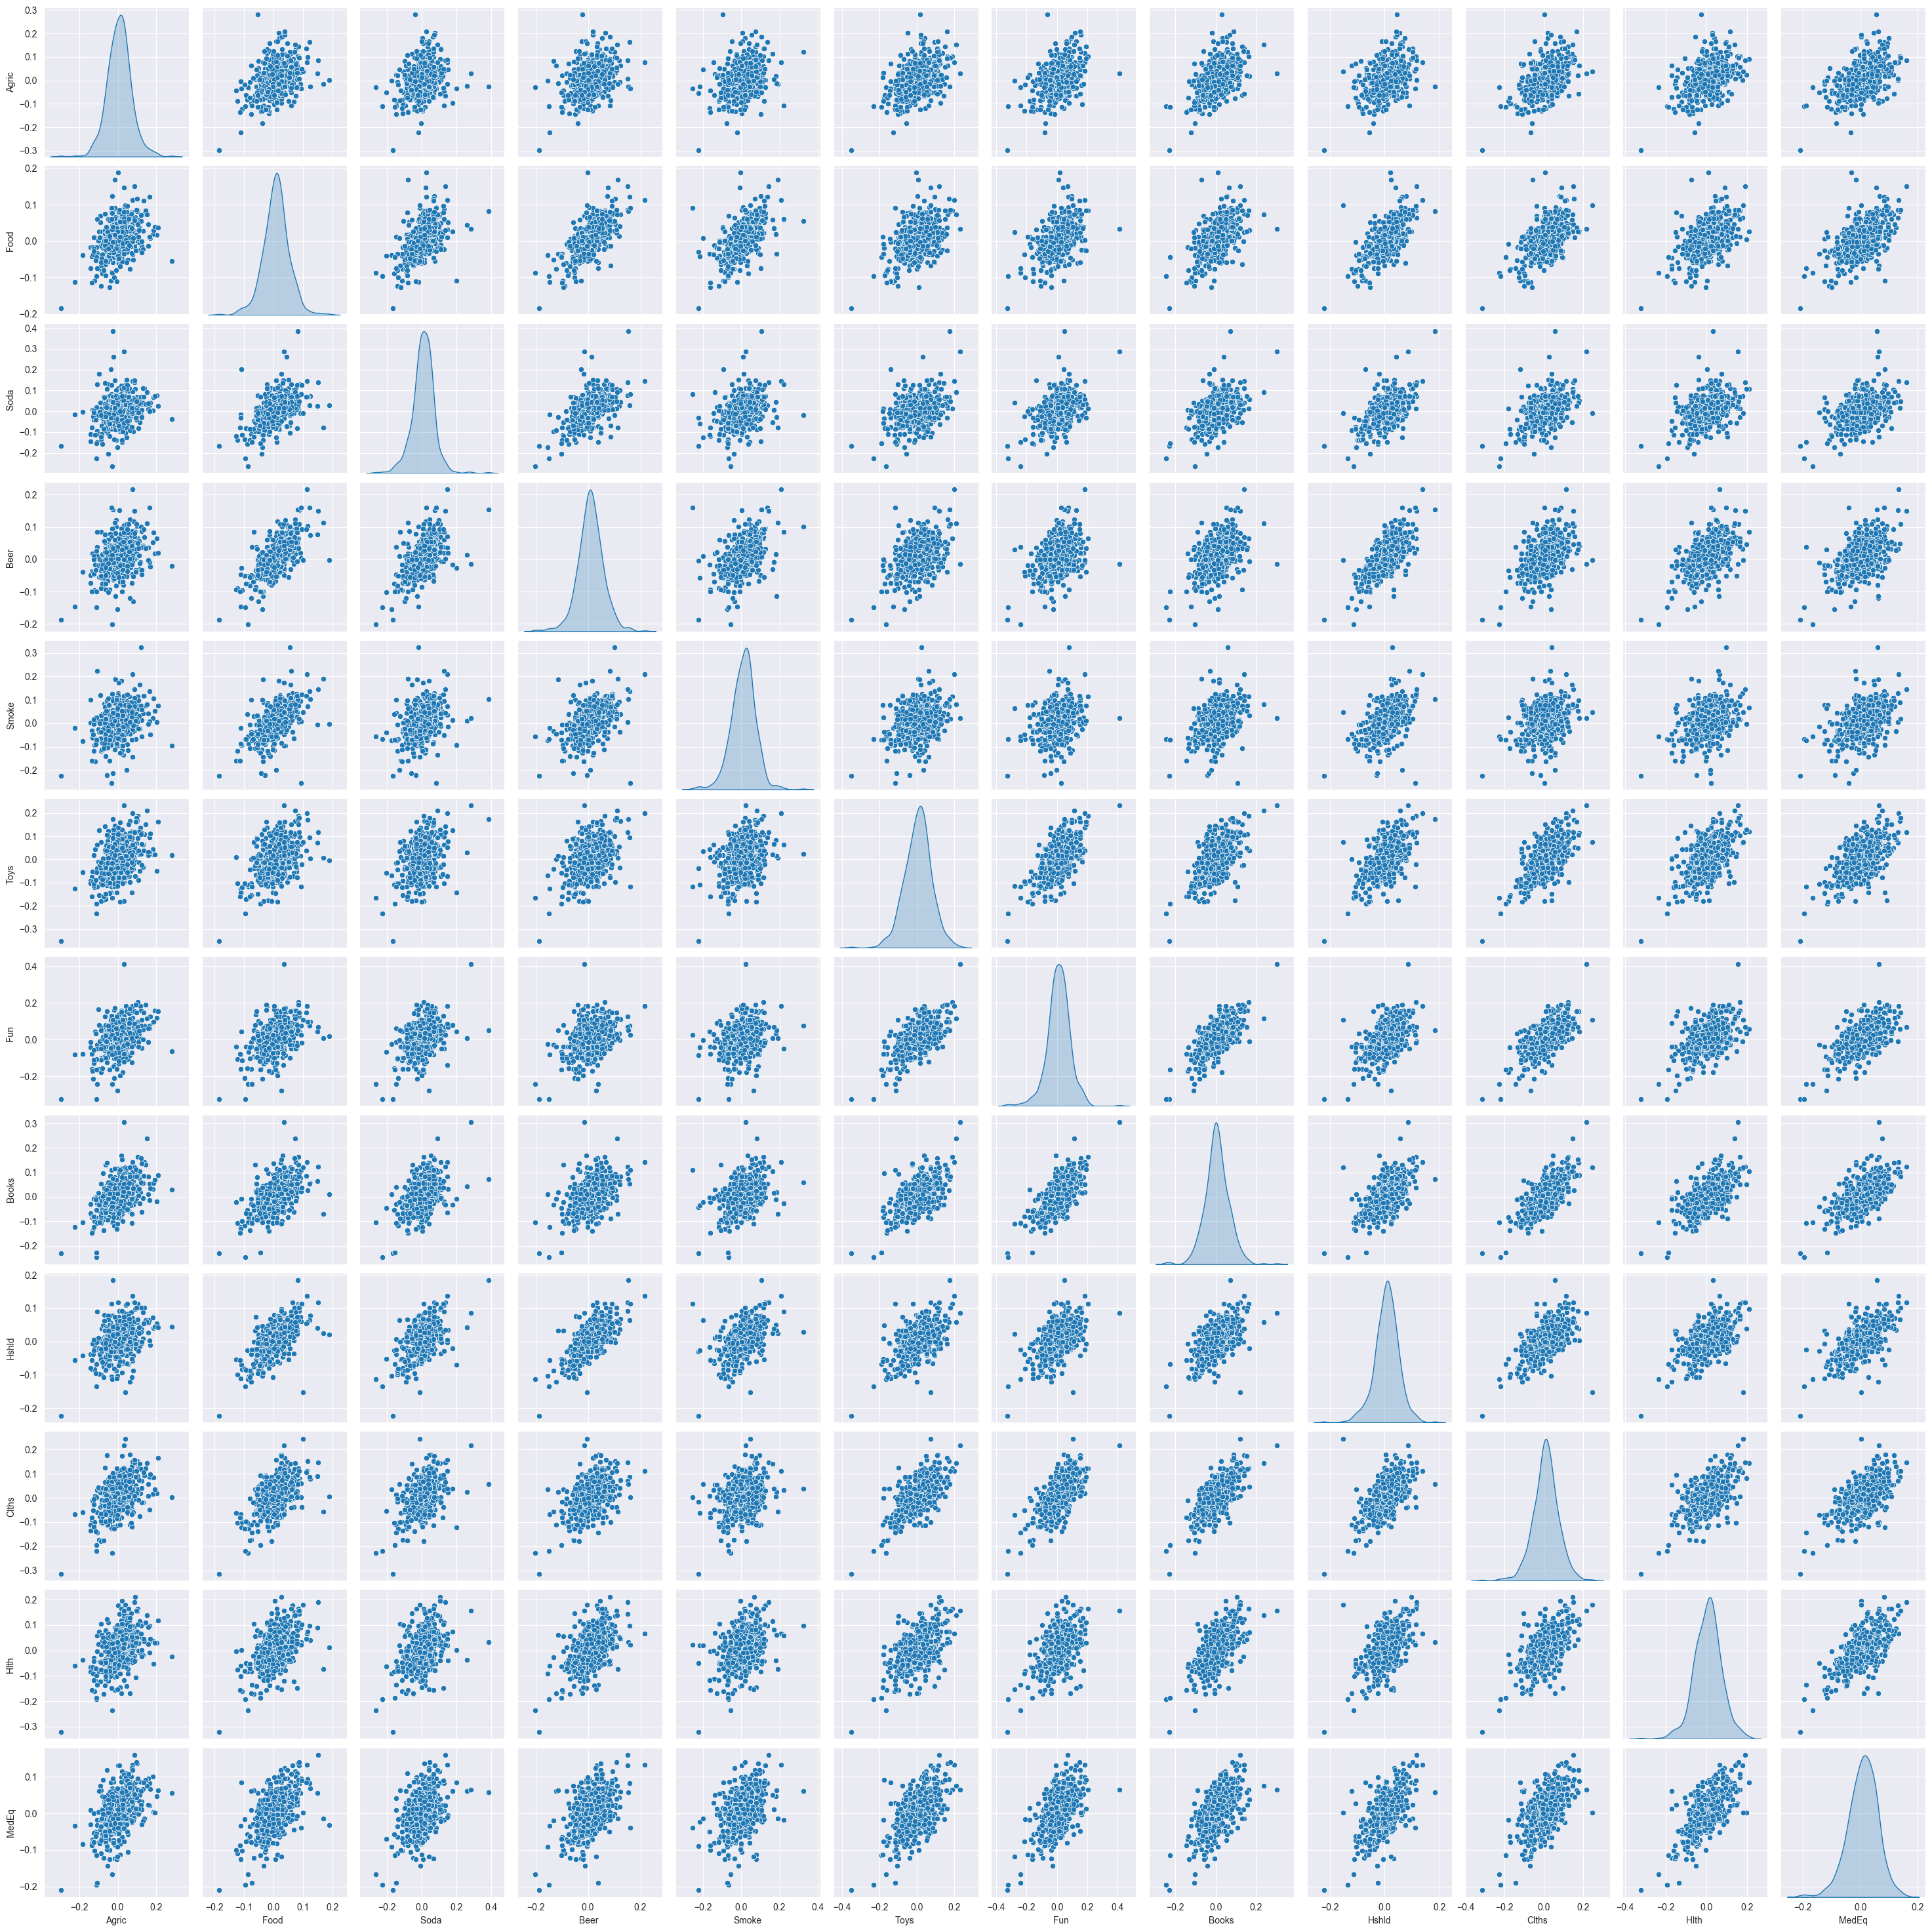

In [12]:
ax = sns.pairplot(assets.iloc[:, :12], diag_kind="kde", plot_kws={"alpha": 1})

yet the returns between assets clearly correlated, so there are underlying factors that are driving these correlations and explain returns, and not vol nor VaR

# 3. CAPM

## 3.1, 3.2. For each of the n = 12 test assets, run the CAPM time-series regression:

In [13]:
def linear_regr(y, X, adj = 12):
    X = sm.add_constant(X)
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()
    
    alpha = results.params[0]
    beta = results.params[1]
    eps = results.resid
    rsq = results.rsquared
    treynor = (y.mean() / beta) * adj
    information = (alpha/eps.std()) * np.sqrt(adj)
    summary = {
        "Alpha": alpha,
        "Beta": beta,
        "Treynor": treynor,
        "Information": information,
        "R-squared": rsq
    }
    summary_df = pd.DataFrame(summary, index=[y.name])
    return summary_df


In [14]:
capm_stats = pd.concat([linear_regr(assets[col], factors['MKT']) for col in assets.columns], axis = 0)
capm_stats

,Alpha,Beta,Treynor,Information,R-squared
Agric,0.001724,0.798755,0.110571,0.115872,0.331350
Food,0.003897,0.583783,0.164785,0.390816,0.370773
Soda,0.003909,0.705939,0.151122,0.246519,0.254164
Beer,0.005138,0.627174,0.182980,0.445491,0.337077
Smoke,0.006472,0.618298,0.210275,0.386822,0.190185
Toys,-0.003006,1.120257,0.052466,-0.204076,0.498587
Fun,0.000563,1.303659,0.089856,0.040342,0.599703
Books,-0.001322,1.061521,0.069727,-0.130391,0.653425
Hshld,0.001849,0.687313,0.116954,0.203497,0.495922
Clths,0.000336,1.072981,0.088428,0.027323,0.566935


## 3.3. If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

If CAPM was true, then alpha = 0, Treynor ratio = mean market returns, information = 0

## 3.4. Calculate the mean-absolute-error of the estimated alphas, (one for each security)

In [15]:
np.abs(capm_stats['Alpha']).mean()

0.001680997938219315

If the pricing model worked, then the MAE should be small, as each alpha is theoretically 0. Based on my calculation, it seems to support the model to a weak extent: 0.17% is small but not that small.

# 4. Multifactor Model

## 4.1. For each regression, report the estimated α and r-squared.

In [16]:
multi_factor_stats = pd.concat([linear_regr(assets[col], factors[['MKT', 'SMB', 'HML', 'UMD']])[['Alpha', 'R-squared']] for col in assets.columns], axis = 0)
multi_factor_stats

,Alpha,R-squared
Agric,0.000759,0.359935
Food,0.002600,0.425322
Soda,0.003379,0.282455
Beer,0.003910,0.377426
Smoke,0.005246,0.236922
Toys,-0.001937,0.536379
Fun,0.002224,0.627993
Books,-0.001718,0.692769
Hshld,0.001303,0.516465
Clths,0.001110,0.595241


## 4.2. Report MAE

In [17]:
np.abs(multi_factor_stats['Alpha']).mean()

0.0017893329840487074

Interestingly, the MAE in the multi-factor model is higher than CAPM??